In [181]:
import pandas as pd
import numpy as np
import quandl
import requests
from dotenv import load_dotenv
import os
import requests
import json
import yfinance as yf
import matplotlib.pyplot as plt



In [182]:
# Get weapons stock data for Gulf War
tickerStrings = ["LMT", "BA", "RTX", "NOC"]
df_list = list()
for ticker in tickerStrings:
    data = yf.download(ticker, group_by="Ticker", start="1990-02-01", end="1991-02-28")
    data["ticker"] = ticker  # add this column because the dataframe doesn't contain a column with the ticker
    df_list.append(data)

# combine all dataframes into a single dataframe
weapons_gulf_df = pd.concat(df_list)

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


In [183]:
weapons_gulf_df

,Open,High,Low,Close,Adj Close,Volume,ticker
Date,,,,,,,
1990-02-01,11.963190,11.963190,11.694785,11.733129,4.849934,163000,LMT
1990-02-02,11.656442,11.924847,11.656442,11.924847,4.929178,399676,LMT
1990-02-05,12.039877,12.078221,11.694785,11.694785,4.834085,421192,LMT
1990-02-06,11.694785,11.694785,11.273006,11.311350,4.675592,262430,LMT
1990-02-07,11.273006,11.388037,11.081288,11.273006,4.659739,567892,LMT
...,...,...,...,...,...,...,...
1991-02-21,11.350219,11.576094,11.237281,11.293750,5.196211,648810,NOC
1991-02-22,11.293750,11.576094,11.237281,11.293750,5.196211,410847,NOC
1991-02-25,11.406688,11.519625,11.180813,11.293750,5.196211,408190,NOC


In [184]:
# Convert dataframe to csv
weapons_gulf_df.to_csv("weapons_gulf.csv")

In [185]:
# Get weapon stock data for Russia-Ukraine Invasion
tickerStrings = ["LMT", "BA", "RTX", "NOC"]
df_list = list()
for ticker in tickerStrings:
    data = yf.download(ticker, group_by="Ticker", start="2021-08-24", end="2022-07-29")
    data["ticker"] = ticker  # add this column because the dataframe doesn't contain a column with the ticker
    df_list.append(data)

# combine all dataframes into a single dataframe
weapons_rusua_df = pd.concat(df_list)

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


In [186]:
weapons_rusua_df

,Open,High,Low,Close,Adj Close,Volume,ticker
Date,,,,,,,
2021-08-24,358.970001,360.489990,357.920013,359.000000,348.898315,822600,LMT
2021-08-25,359.690002,360.649994,357.989990,358.750000,348.655365,953500,LMT
2021-08-26,359.100006,361.980011,357.239990,361.619995,351.444580,1172400,LMT
2021-08-27,363.290009,364.329987,361.179993,361.989990,351.804199,1203900,LMT
2021-08-30,362.250000,363.959991,361.750000,362.049988,351.862488,986000,LMT
...,...,...,...,...,...,...,...
2022-07-22,457.369995,463.260010,450.010010,451.850006,451.850006,864700,NOC
2022-07-25,451.890015,459.739990,451.109985,453.320007,453.320007,826500,NOC
2022-07-26,453.149994,455.109985,444.309998,444.649994,444.649994,702500,NOC


In [187]:
# Convert dataframe to csv
weapons_rusua_df.to_csv("weapons_rusua.csv")

In [188]:
# Import crude oil prices from csv
crude_df = pd.read_csv("Resources/Cushing_OK_WTI_Spot_Price_FOB.csv")
crude_df = crude_df.rename(columns={"Cushing OK WTI Spot Price FOB Dollars per Barrel":"WTI in Dollars Per Barrel"})

In [189]:
# Check for null values
crude_df.isnull().sum()

Month                        0
WTI in Dollars Per Barrel    0
dtype: int64

In [190]:
# Change "Month" column to datetime object
crude_df["Month"]=pd.to_datetime(crude_df["Month"])

In [191]:
# Set "Month" as the index
crude_df.set_index("Month", inplace=True)

In [192]:
# Create Data Frame for oil prices during the Russian / Ukrainian Conflict
rus_ua_oil = crude_df.iloc[0:11,:]

In [193]:
# Create Data Frame for oil prices during the Gulf War
gulf_oil = crude_df.loc["Feb 1990":"Dec 1990"]

In [194]:
## function to graph data 

def plot_graph(df, title:str, y_label: str):
    
        ## graphing the data

    cols =[col for col in df.columns]

    fig,ax = plt.subplots(1,1, figsize = (14,6))
    plt.style.use('seaborn')

    for c in cols: 
        ax.plot(c, linewidth=2, data=df)
        ax.set_title(title)
        plt.xlabel('Date')
        plt.ylabel(y_label)

        handles,labels = ax.get_legend_handles_labels()
        ax.legend(handles, labels, loc='upper left', prop = {"size":10})

    plt.show()

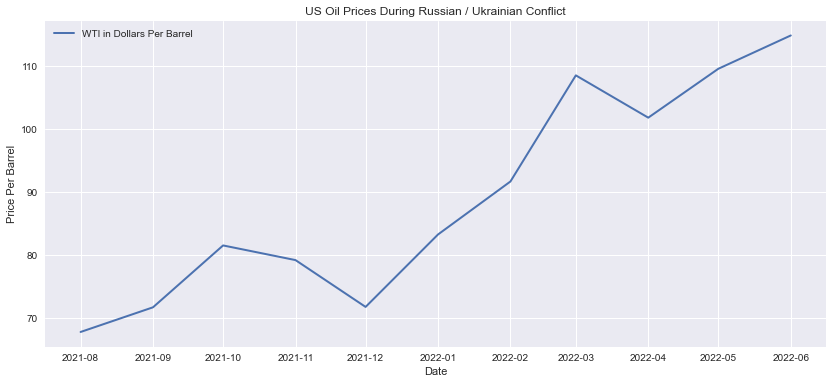

In [195]:
# Plot the data

plot_graph(rus_ua_oil, title="US Oil Prices During Russian / Ukrainian Conflict", y_label="Price Per Barrel")

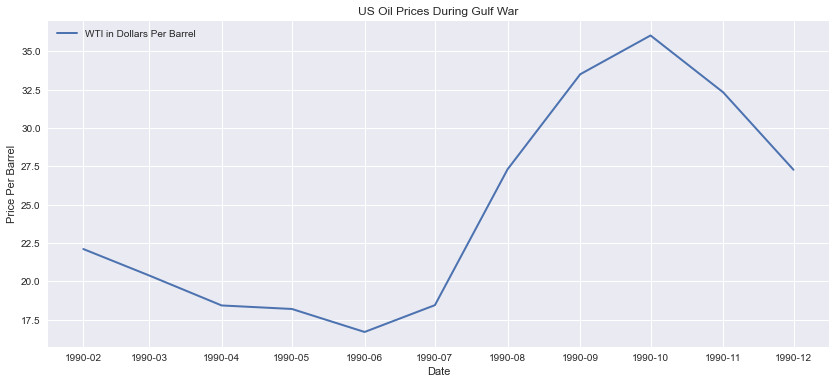

In [196]:
plot_graph(gulf_oil, title="US Oil Prices During Gulf War", y_label="Price Per Barrel")

In [197]:
# Create data frame for oil prices during war in Iraq
iraq_oil = crude_df.loc["Mar 2003":"Dec 2011"]

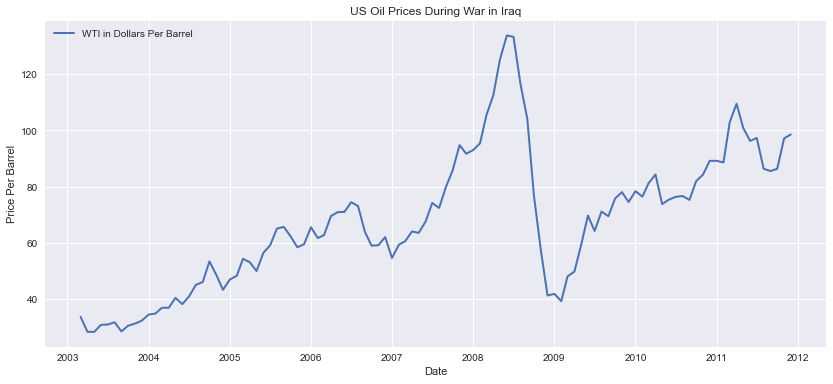

In [199]:
# Plot graph for war in Iraq
plot_graph(iraq_oil, title="US Oil Prices During War in Iraq", y_label="Price Per Barrel")